In [609]:
from importlib import reload
import matplotlib.pyplot as plt

In [610]:
import VAE
reload(VAE)
from VAE import *

In [611]:
Nz = 200
grid = np.linspace(0, 1, Nz)
dx = grid[1] - grid[0]
x = generate_leaks(grid, 1000, random_state=0)

In [612]:
net = VAE([Nz, 100, 64, 32, 4], [4, 32, 64, 100, Nz], dx, 'tanh', structure=True)
model = Model(x, net)
model.train(10000, val_interval=100)

step       loss       rec        reg
100        5.32e+00   4.52e+00   8.05e-01
200        3.81e+00   2.76e+00   1.05e+00
300        2.87e+00   1.70e+00   1.16e+00
400        2.28e+00   1.07e+00   1.21e+00
500        2.21e+00   9.84e-01   1.23e+00
600        2.21e+00   9.97e-01   1.21e+00
700        2.14e+00   9.20e-01   1.22e+00
800        2.14e+00   9.28e-01   1.21e+00
900        2.15e+00   9.37e-01   1.21e+00
1000       2.12e+00   9.14e-01   1.21e+00
1100       2.09e+00   8.80e-01   1.21e+00
1200       2.07e+00   8.51e-01   1.22e+00
1300       2.07e+00   8.70e-01   1.20e+00
1400       2.06e+00   8.54e-01   1.20e+00
1500       2.05e+00   8.30e-01   1.22e+00
1600       2.06e+00   8.28e-01   1.23e+00
1700       2.03e+00   8.21e-01   1.21e+00
1800       2.05e+00   8.32e-01   1.22e+00
1900       2.01e+00   7.87e-01   1.23e+00
2000       2.01e+00   7.85e-01   1.23e+00
2100       2.03e+00   7.84e-01   1.24e+00
2200       1.98e+00   7.53e-01   1.23e+00
2300       1.98e+00   7.49e-01   1.23e+

torch.Size([10, 200])
(10, 200)


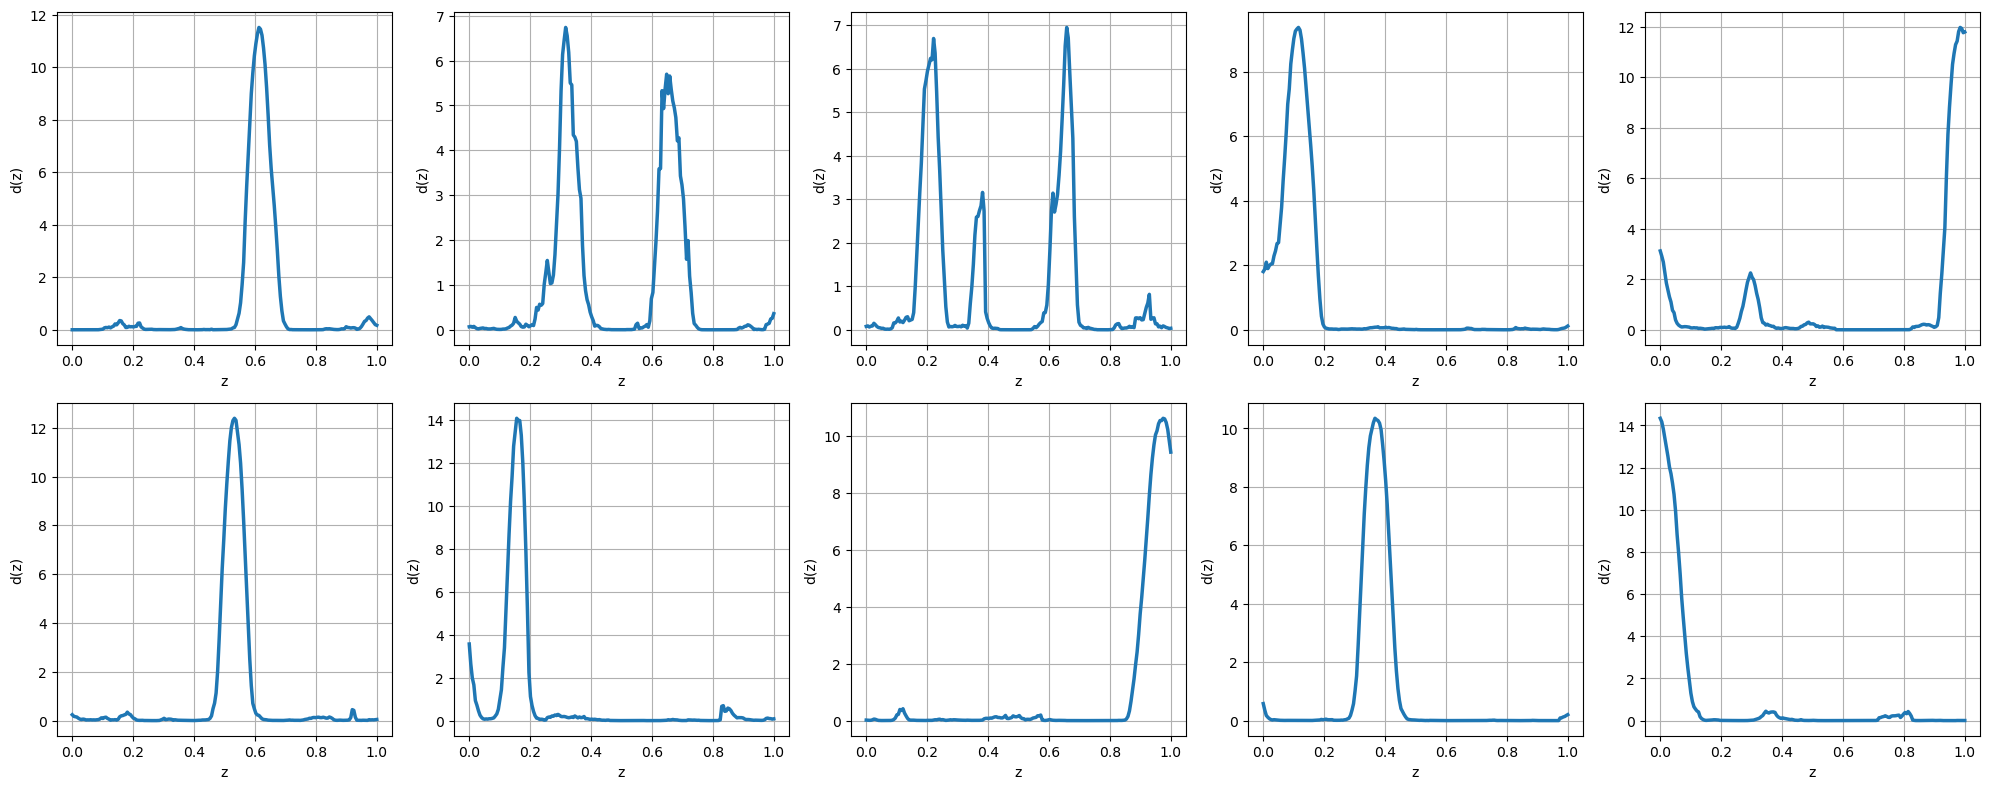

In [613]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # 2 rows × 5 columns
axes = axes.flatten()

x = generate_leaks(grid, 10, random_state=3)


print(x.shape)

#z = model.net.encoder(x)[0]

z = torch.randn(10, 4)
x_hat = model.net.decoder(z).detach().numpy()


print(x_hat.shape)
#x_hat = model.net(x)[0].detach()


for j, ax in enumerate(axes):
    #ax.plot(grid, x[j,:], label=f"Sample {j+1}", linewidth=2.5)
    ax.plot(grid, x_hat[j,:], label=f"Sample {j+1}", linewidth=2.5)
    ax.set_xlabel("z")
    ax.set_ylabel("d(z)")
    ax.grid(True)

plt.tight_layout()
plt.show()